In [ ]:
from lectures.IPPlanarManipulator import PlanarJoint, PlanarRobot, generate_consistent_joint_config
from lectures.IPEnvironmentKin import KinChainCollisionChecker, planarRobotVisualize
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely import plotting
import sympy as sp
import numpy as np

obst = dict()
obst["obs1"] = LineString([(-2, 0), (-0.8, 0)]).buffer(0.5)
obst["obs2"] = LineString([(2, 0), (2, 1)]).buffer(0.2)
obst["obs3"] = LineString([(-1, 2), (1, 2)]).buffer(0.1)


## 2-DOF Example

In [ ]:
r = PlanarRobot(n_joints=2, total_length=3.5)
environment = KinChainCollisionChecker(r, obst,fk_resolution=.2)

start_joint_angles = generate_consistent_joint_config(r.dim, total_angle=2.0, curvature=0.45)
start_joint_pos = sp.Matrix(start_joint_angles)

end_joint_angles = generate_consistent_joint_config(r.dim, total_angle=-1.85, curvature=-0.45)
end_joint_pos = sp.Matrix(end_joint_angles)

fig_local = plt.figure(figsize=(14, 7))
## right figure for robot start position
ax1 = fig_local.add_subplot(1, 2, 1)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
environment.drawObstacles(ax1, True)
r.move(start_joint_pos)
planarRobotVisualize(r, ax1)
r.move(end_joint_pos)
planarRobotVisualize(r, ax1)


In [ ]:
from lectures.IPLazyPRM import LazyPRM
from lectures.IPVISLazyPRM import lazyPRMVisualize
from lectures.IPBasicPRM import BasicPRM
from lectures.IPVISBasicPRM import basicPRMVisualize
from lectures.IPVisibilityPRM import VisPRM
from lectures.IPVISVisibilityPRM import visibilityPRMVisualize
from lectures.IPEnvironmentKin import animateSolution

lazyPRM = LazyPRM(environment)
lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 30
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 15
lazyConfig["maxIterations"] = 15

start_joint_pos = [2.0, 0.5]
end_joint_pos = [-2.0, -0.5]

start = [start_joint_pos]
goal  = [end_joint_pos]

## plan path from start to goal
solution = lazyPRM.planPath(start, goal, lazyConfig)
print(solution)

In [ ]:
animateSolution(lazyPRM, environment, solution, lazyPRMVisualize)

In [ ]:
basicPRM = BasicPRM(environment)
basicConfig = dict()
basicConfig["numNodes"] = 80
basicConfig["radius"] = 4
solution_basic = basicPRM.planPath(start, goal, basicConfig)
print(solution_basic)

In [ ]:
animateSolution(basicPRM, environment, solution_basic, basicPRMVisualize)

In [ ]:
visPRM = VisPRM(environment)
visConfig = dict()
visConfig["ntry"] = 30

solution_basic = visPRM.planPath(start, goal, visConfig)
print(solution_basic)

In [ ]:
animateSolution(visPRM, environment, solution_basic, visibilityPRMVisualize)

## 4-DoF

AttributeError: 'PlanarRobot' object has no attribute 'getEndpointPositions'

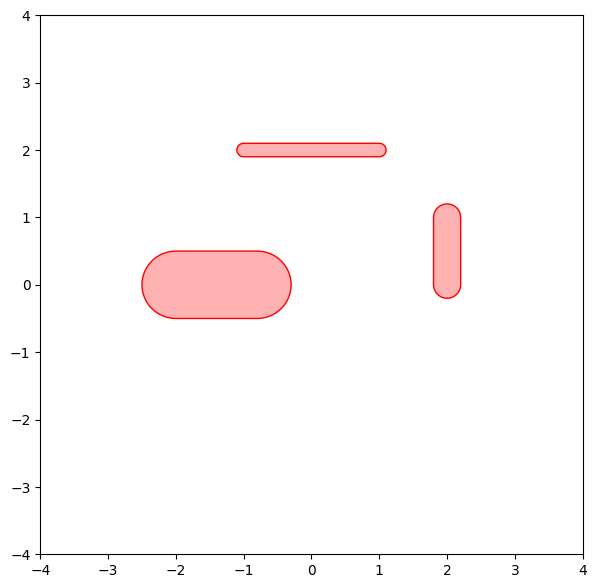

In [1]:
from robotSetup import setup
# create 4 DoF robot
r, environment, start, goal, fig_local, ax = setup(n_dof=4)

## 6-DoF

In [ ]:
r = PlanarRobot(n_joints=6, total_length=1.5)
limits = [[-3.14,3.14]] * r.dim
environment = KinChainCollisionChecker(r, obst,limits=limits, fk_resolution=.2)

start_joint_angles = generate_consistent_joint_config(r.dim, total_angle=2, curvature=0.45)
start_joint_pos = sp.Matrix(start_joint_angles)

end_joint_angles = generate_consistent_joint_config(r.dim, total_angle=-1.85, curvature=-0.45)
end_joint_pos = sp.Matrix(end_joint_angles)

fig_local = plt.figure(figsize=(14, 7))
## right figure for robot start position
ax1 = fig_local.add_subplot(1, 2, 1)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
environment.drawObstacles(ax1, True)
r.move(start_joint_pos)
planarRobotVisualize(r, ax1)
r.move(end_joint_pos)
planarRobotVisualize(r, ax1)

In [ ]:
## plan path from start to goal
lazyPRM = LazyPRM(environment)
start = [np.array(start_joint_angles, dtype=np.float32)]
goal = [np.array(end_joint_angles, dtype=np.float32)]
## plan path from start ot goal
solution = lazyPRM.planPath(start, goal, lazyConfig)
print(solution)

In [ ]:
animateSolution(lazyPRM, environment, solution, lazyPRMVisualize)

In [ ]:
visPRM = VisPRM(environment)
visConfig = dict()
visConfig["ntry"] = 20

solution = visPRM.planPath(start, goal, visConfig)
print(solution)